In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from scipy import stats

In [2]:
import prepare
import summarize

In [3]:
blob = pd.read_csv('50k-posts-from-relationship-advice.csv')

In [ ]:
new_heads = ['age1','age2','dunno','comment']
blob.columns = new_heads

In [46]:
blob.head()

,age1,age2,dunno,comment,difference,couples_age_mean,cluster_labels
0,18,20,3iwrcd,I [20M] asked a friend [18F] to the movies. Di...,-2,19.0,3
1,17,16,3iwucq,Me (16/M) not sure if co-worker (17/F) is bein...,1,16.5,3
2,17,16,3iwx0l,Me [16/M] Not sure if my co-worker [17/F] is b...,1,16.5,3
3,26,22,3iwx5t,Me [22/M] and my GF [26/F] having been seeing ...,4,24.0,0
4,35,42,3iwxnf,Is my wife [35/F] controlling or is it me [42/M]?,-7,38.5,4


In [9]:
blob['difference'] = blob.age1 - blob.age2

In [25]:
blob['couples_age_mean'] = (blob.age1 + blob.age2)/2

In [57]:
pd.cut(blob['age1'], 9, retbins=True)

(0        (11.0, 22.0]
 1        (11.0, 22.0]
 2        (11.0, 22.0]
 3        (22.0, 33.0]
 4        (33.0, 44.0]
 5        (22.0, 33.0]
 6        (22.0, 33.0]
 7        (11.0, 22.0]
 8        (22.0, 33.0]
 9        (11.0, 22.0]
 10       (22.0, 33.0]
 11       (22.0, 33.0]
 12       (11.0, 22.0]
 13       (11.0, 22.0]
 14       (11.0, 22.0]
 15       (11.0, 22.0]
 16       (11.0, 22.0]
 17       (22.0, 33.0]
 18       (11.0, 22.0]
 19       (22.0, 33.0]
 20       (11.0, 22.0]
 21       (11.0, 22.0]
 22       (11.0, 22.0]
 23       (11.0, 22.0]
 24       (33.0, 44.0]
 25       (11.0, 22.0]
 26       (11.0, 22.0]
 27       (11.0, 22.0]
 28       (11.0, 22.0]
 29       (11.0, 22.0]
              ...     
 47509    (22.0, 33.0]
 47510    (22.0, 33.0]
 47511    (22.0, 33.0]
 47512    (11.0, 22.0]
 47513    (22.0, 33.0]
 47514    (33.0, 44.0]
 47515    (11.0, 22.0]
 47516    (22.0, 33.0]
 47517    (22.0, 33.0]
 47518    (22.0, 33.0]
 47519    (11.0, 22.0]
 47520    (11.0, 22.0]
 47521    (

In [27]:
blob.corr()

,age1,age2,difference,couples_age_mean
age1,1.000000,0.700542,0.182982,0.906683
age2,0.700542,1.000000,-0.573376,0.936179
difference,0.182982,-0.573376,1.000000,-0.248783
couples_age_mean,0.906683,0.936179,-0.248783,1.000000


In [21]:
blob = blob[blob.age1<100]

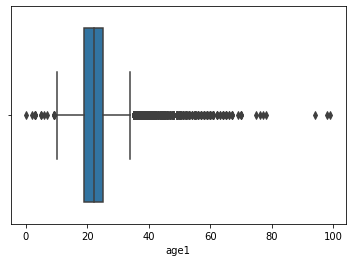

In [22]:
sns.boxplot(blob.age1)

In [31]:
blob = blob[blob.age2<100]

In [64]:
(blob.age2 > 40).sum()/len(blob)

0.01743978121384243

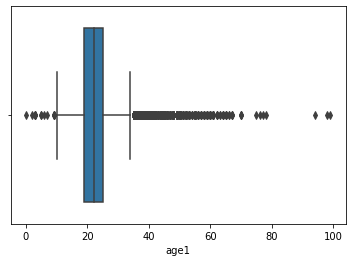

In [67]:
sns.boxplot(blob.age1)

In [40]:
X = blob[['age1','age2']]

In [39]:
kmeans = KMeans(n_clusters=5)

In [42]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
predicted_groups = kmeans.predict(X)

In [45]:
blob['cluster_labels'] = predicted_groups

In [35]:
q1, q3 = blob.age1.quantile([.25, .75])

In [37]:
q3

25.0

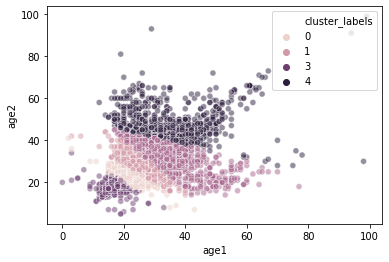

In [66]:
sns.scatterplot(x="age1", y="age2", data=blob, hue='cluster_labels', alpha=0.5)

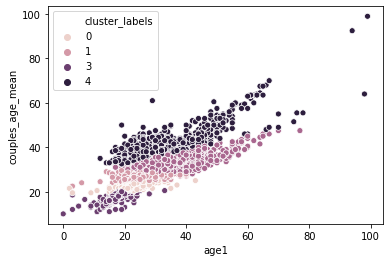

In [73]:
sns.scatterplot(x="age1", y="couples_age_mean", data=blob, hue='cluster_labels')

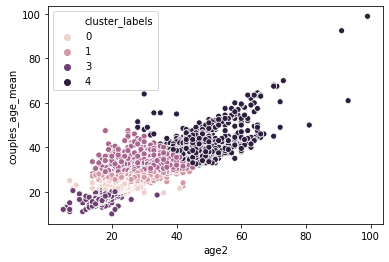

In [72]:
sns.scatterplot(x="age2", y="couples_age_mean", data=blob, hue='cluster_labels')

In [71]:
from yellowbrick.cluster import KElbowVisualizer

ModuleNotFoundError: No module named 'yellowbrick'